In [1]:
import os
import pandas as pd
import numpy as np
#visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#consistent sized plot 
from pylab import rcParams
rcParams['figure.figsize']=12,5
rcParams['axes.labelsize']=12
rcParams['xtick.labelsize']=12
rcParams['ytick.labelsize']=12
#handle the warnings in the code
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)
#text preprocessing libraries
import nltk
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
#import texthero
#import texthero as hero
#regular expressions
import re
#display pandas dataframe columns 
pd.options.display.max_columns = None
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

from sklearn import preprocessing

import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight

import numpy as np
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2024-03-16 02:38:36.372092: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-16 02:38:36.372273: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-16 02:38:36.580592: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
pip install keras


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv("/kaggle/input/traindataset/train.csv")
df


Unnamed: 0.1  Unnamed: 0  count  hate_speech_count  \
0                 0           0      3                  0   
1                 1           1      3                  0   
2                 2           2      3                  0   
3                 3           3      3                  0   
4                 4           4      6                  0   
...             ...         ...    ...                ...   
24778         24778       24778      3                  0   
24779         24779       24779      3                  0   
24780         24780       24780      3                  0   
24781         24781       24781      6                  0   
24782         24782       24782      3                  0   

       offensive_language_count  neither_count  class  \
0                             0              3      2   
1                             3              0      1   
2                             3              0      1   
3                             2              1      1   
4                             6              0      1   
...                         ...            ...    ...   
24778                         2              1      1   
24779                         1              2      2   
24780                         3              0      1   
24781                         6              0      1   
24782                         0              3      2   

                                                   tweet  
0      (this text should be deleted) !!! RT @mayasolo...  
1      (this text should be deleted) !!!!! RT @mleew1...  
2      (this text should be deleted) !!!!!!! RT @UrKi...  
3      (this text should be deleted) !!!!!!!!! RT @C_...  
4      (this text should be deleted) !!!!!!!!!!!!! RT...  
...                                                  ...  
24778  (this text should be deleted) you's a muthaf**...  
24779  (this text should be deleted) you've gone and ...  
24780  (this text should be deleted) young buck wanna...  
24781  (this text should be deleted) youu got wild bi...  
24782  (this text should be deleted) ~~Ruffled | Ntac...  

[24783 rows x 8 columns]

In [4]:
df.head(10)

Unnamed: 0.1  Unnamed: 0  count  hate_speech_count  \
0             0           0      3                  0   
1             1           1      3                  0   
2             2           2      3                  0   
3             3           3      3                  0   
4             4           4      6                  0   
5             5           5      3                  1   
6             6           6      3                  0   
7             7           7      3                  0   
8             8           8      3                  0   
9             9           9      3                  1   

   offensive_language_count  neither_count  class  \
0                         0              3      2   
1                         3              0      1   
2                         3              0      1   
3                         2              1      1   
4                         6              0      1   
5                         2              0      1   
6                         3              0      1   
7                         3              0      1   
8                         3              0      1   
9                         2              0      1   

                                               tweet  
0  (this text should be deleted) !!! RT @mayasolo...  
1  (this text should be deleted) !!!!! RT @mleew1...  
2  (this text should be deleted) !!!!!!! RT @UrKi...  
3  (this text should be deleted) !!!!!!!!! RT @C_...  
4  (this text should be deleted) !!!!!!!!!!!!! RT...  
5  (this text should be deleted) !!!!!!!!!!!!!!!!...  
6  (this text should be deleted) !!!!!!"@__Bright...  
7  (this text should be deleted) !!!!&#8220;@self...  
8  (this text should be deleted) " &amp; you migh...  
9  (this text should be deleted) " @rhythmixx_ :h...

In [5]:
df.isna().sum()


Unnamed: 0.1                0
Unnamed: 0                  0
count                       0
hate_speech_count           0
offensive_language_count    0
neither_count               0
class                       0
tweet                       0
dtype: int64

In [6]:
df.describe()


Unnamed: 0.1    Unnamed: 0         count  hate_speech_count  \
count  24783.000000  24783.000000  24783.000000       24783.000000   
mean   12391.000000  12391.000000      3.243473           0.280515   
std     7154.380197   7154.380197      0.883060           0.631851   
min        0.000000      0.000000      3.000000           0.000000   
25%     6195.500000   6195.500000      3.000000           0.000000   
50%    12391.000000  12391.000000      3.000000           0.000000   
75%    18586.500000  18586.500000      3.000000           0.000000   
max    24782.000000  24782.000000      9.000000           7.000000   

       offensive_language_count  neither_count         class  
count              24783.000000   24783.000000  24783.000000  
mean                   2.413711       0.549247      1.110277  
std                    1.399459       1.113299      0.462089  
min                    0.000000       0.000000      0.000000  
25%                    2.000000       0.000000      1.000000  
50%                    3.000000       0.000000      1.000000  
75%                    3.000000       0.000000      1.000000  
max                    9.000000       9.000000      2.000000

In [7]:
df['class'].value_counts()


class
1    19190
2     4163
0     1430
Name: count, dtype: int64

In [8]:
random = np.random.randint(0,len(df))
print(random)
df.iloc[random]['tweet']

11283


"(this text should be deleted) I'm going to punch a bitch if my cleats don't come in&#128544;"

In [9]:
dfs = df.copy()



In [10]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words
dfs['tweet'] = dfs['tweet'].astype(str)
dfs['tweet'] = dfs['tweet'].apply(remove_stopwords)


In [11]:
dfs['tweet'].head()


0    [(, text, deleted, ), !, !, !, RT, @, mayasolo...
1    [(, text, deleted, ), !, !, !, !, !, RT, @, ml...
2    [(, text, deleted, ), !, !, !, !, !, !, !, RT,...
3    [(, text, deleted, ), !, !, !, !, !, !, !, !, ...
4    [(, text, deleted, ), !, !, !, !, !, !, !, !, ...
Name: tweet, dtype: object

In [12]:
dfs['tweet'].replace(r'@\w+','',regex=True,inplace=True)



In [13]:
dfs['tweet'].head()


0    [(, text, deleted, ), !, !, !, RT, @, mayasolo...
1    [(, text, deleted, ), !, !, !, !, !, RT, @, ml...
2    [(, text, deleted, ), !, !, !, !, !, !, !, RT,...
3    [(, text, deleted, ), !, !, !, !, !, !, !, !, ...
4    [(, text, deleted, ), !, !, !, !, !, !, !, !, ...
Name: tweet, dtype: object

In [14]:
dfs['tweet'].replace(r'http\S+','',regex=True,inplace=True)



In [15]:
dfs['tweet'].head()


0    [(, text, deleted, ), !, !, !, RT, @, mayasolo...
1    [(, text, deleted, ), !, !, !, !, !, RT, @, ml...
2    [(, text, deleted, ), !, !, !, !, !, !, !, RT,...
3    [(, text, deleted, ), !, !, !, !, !, !, !, !, ...
4    [(, text, deleted, ), !, !, !, !, !, !, !, !, ...
Name: tweet, dtype: object

In [16]:
tokenizer = TweetTokenizer(preserve_case=True)
dfs['tweet'] = dfs['tweet'].astype(str)
dfs['tweet'] = dfs['tweet'].apply(tokenizer.tokenize)

In [17]:
dfs.head(3)


Unnamed: 0.1  Unnamed: 0  count  hate_speech_count  \
0             0           0      3                  0   
1             1           1      3                  0   
2             2           2      3                  0   

   offensive_language_count  neither_count  class  \
0                         0              3      2   
1                         3              0      1   
2                         3              0      1   

                                               tweet  
0  [[, ', (, ', ,, ', text, ', ,, ', deleted, ', ...  
1  [[, ', (, ', ,, ', text, ', ,, ', deleted, ', ...  
2  [[, ', (, ', ,, ', text, ', ,, ', deleted, ', ...

In [18]:
dfs['tweet'].head()


0    [[, ', (, ', ,, ', text, ', ,, ', deleted, ', ...
1    [[, ', (, ', ,, ', text, ', ,, ', deleted, ', ...
2    [[, ', (, ', ,, ', text, ', ,, ', deleted, ', ...
3    [[, ', (, ', ,, ', text, ', ,, ', deleted, ', ...
4    [[, ', (, ', ,, ', text, ', ,, ', deleted, ', ...
Name: tweet, dtype: object

In [19]:
def remove_hashsymbols(text):
    '''Function to remove the hashtag symbol from the text'''
    pattern = re.compile(r'#')
    text = ' '.join(text)
    clean_text = re.sub(pattern,'',text)
    return tokenizer.tokenize(clean_text)  

dfs['tweet'] = dfs['tweet'].apply(remove_hashsymbols)


In [20]:
dfs['tweet'].head()


0    [[, ', (, ', ,, ', text, ', ,, ', deleted, ', ...
1    [[, ', (, ', ,, ', text, ', ,, ', deleted, ', ...
2    [[, ', (, ', ,, ', text, ', ,, ', deleted, ', ...
3    [[, ', (, ', ,, ', text, ', ,, ', deleted, ', ...
4    [[, ', (, ', ,, ', text, ', ,, ', deleted, ', ...
Name: tweet, dtype: object

In [21]:
def rem_shortwords(text):
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if len(word) > 2]  # Convert words to lowercase, filter out short words, and exclude specified words
    new_text = ' '.join(filtered_words)
    return new_text


In [22]:

dfs['tweet'] = dfs['tweet'].astype(str)

dfs['tweet'] = dfs['tweet'].apply(rem_shortwords)


In [23]:
dfs.head(3)


Unnamed: 0.1  Unnamed: 0  count  hate_speech_count  \
0             0           0      3                  0   
1             1           1      3                  0   
2             2           2      3                  0   

   offensive_language_count  neither_count  class  \
0                         0              3      2   
1                         3              0      1   
2                         3              0      1   

                                               tweet  
0  'text 'deleted 'rt 'mayasolovely 'as 'woman n'...  
1  'text 'deleted 'rt 'mleew '17 'boy 'dats 'cold...  
2  'text 'deleted 'rt 'urkindofbrand 'dawg 'rt '8...

In [24]:
dfs['tweet'] = dfs['tweet'].apply(tokenizer.tokenize)


In [25]:
dfs['tweet'].head()


0    [', text, ', deleted, ', rt, ', mayasolovely, ...
1    [', text, ', deleted, ', rt, ', mleew, ', 17, ...
2    [', text, ', deleted, ', rt, ', urkindofbrand,...
3    [', text, ', deleted, ', rt, ', c_g_anderson, ...
4    [', text, ', deleted, ', rt, ', shenikaroberts...
Name: tweet, dtype: object

In [26]:
def rem_digits(text):
    '''Function to remove the digits from the list of strings'''
    no_digits = []
    for word in text:
        no_digits.append(re.sub(r'\d','',word))
    return ' '.join(no_digits)   

In [27]:
dfs['tweet'] = dfs['tweet'].apply(rem_digits)


In [28]:
dfs['tweet'] = dfs['tweet'].apply(tokenizer.tokenize)


In [29]:
dfs.head()


Unnamed: 0.1  Unnamed: 0  count  hate_speech_count  \
0             0           0      3                  0   
1             1           1      3                  0   
2             2           2      3                  0   
3             3           3      3                  0   
4             4           4      6                  0   

   offensive_language_count  neither_count  class  \
0                         0              3      2   
1                         3              0      1   
2                         3              0      1   
3                         2              1      1   
4                         6              0      1   

                                               tweet  
0  [', text, ', deleted, ', rt, ', mayasolovely, ...  
1  [', text, ', deleted, ', rt, ', mleew, ', ', b...  
2  [', text, ', deleted, ', rt, ', urkindofbrand,...  
3  [', text, ', deleted, ', rt, ', c_g_anderson, ...  
4  [', text, ', deleted, ', rt, ', shenikaroberts...

In [30]:
def rem_nonalpha(text):
    '''Function to remove the non-alphanumeric characters from the text'''
    text = [word for word in text if word.isalpha()]
    return text

In [31]:
dfs['tweet'] = dfs['tweet'].apply(rem_nonalpha)



In [32]:
dfs.head()


Unnamed: 0.1  Unnamed: 0  count  hate_speech_count  \
0             0           0      3                  0   
1             1           1      3                  0   
2             2           2      3                  0   
3             3           3      3                  0   
4             4           4      6                  0   

   offensive_language_count  neither_count  class  \
0                         0              3      2   
1                         3              0      1   
2                         3              0      1   
3                         2              1      1   
4                         6              0      1   

                                               tweet  
0  [text, deleted, rt, mayasolovely, as, woman, c...  
1  [text, deleted, rt, mleew, boy, dats, cold, ty...  
2  [text, deleted, rt, urkindofbrand, dawg, rt, s...  
3            [text, deleted, rt, look, like, tranny]  
4  [text, deleted, rt, shenikaroberts, the, shit,...

In [33]:
dfs['tweet'] = dfs['tweet'].apply(lambda x: ' '.join(x))


In [40]:
random = np.random.randint(0,len(df))
print(random)
dfs.iloc[random]['tweet']

9041


'text deleted facebook birds'

In [35]:
dfs.head(3)


Unnamed: 0.1  Unnamed: 0  count  hate_speech_count  \
0             0           0      3                  0   
1             1           1      3                  0   
2             2           2      3                  0   

   offensive_language_count  neither_count  class  \
0                         0              3      2   
1                         3              0      1   
2                         3              0      1   

                                               tweet  
0  text deleted rt mayasolovely as woman complain...  
1  text deleted rt mleew boy dats cold tyga dwn b...  
2  text deleted rt urkindofbrand dawg rt sbabylif...

In [36]:
token = Tokenizer(28164)
token.fit_on_texts(dfs['tweet'])
text = token.texts_to_sequences(dfs['tweet'])
text = pad_sequences(text, maxlen=100)

In [37]:
X = dfs['tweet']
y = dfs['class']

In [38]:
from sklearn.model_selection import train_test_split

test_size = 0.20 #20% of the data in the 
X_train,X_test,y_train,y_test = train_test_split(text,y,test_size=0.20,random_state=42,stratify=dfs['class'])
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(19826, 100) (4957, 100) (19826,) (4957,)


In [41]:
from tensorflow.keras.callbacks import EarlyStopping
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=24071, output_dim=32),
    tf.keras.layers.LSTM(32, dropout=0.2),  # Add dropout to LSTM layer
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)  
# Stop training if validation loss does not improve after 3 epochs, restore best weights

# Train the model with early stopping
history = model.fit(X_train, y_train, validation_split=0.2, epochs=3, batch_size=16, callbacks=[early_stopping]) 


Epoch 1/3
992/992 ━━━━━━━━━━━━━━━━━━━━ 42s 39ms/step - accuracy: 0.8117 - loss: 0.5500 - val_accuracy: 0.9065 - val_loss: 0.2622
Epoch 2/3
992/992 ━━━━━━━━━━━━━━━━━━━━ 40s 39ms/step - accuracy: 0.9238 - loss: 0.2265 - val_accuracy: 0.9130 - val_loss: 0.2464
Epoch 3/3
992/992 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - accuracy: 0.9528 - loss: 0.1438 - val_accuracy: 0.8994 - val_loss: 0.2943


In [42]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9075 - loss: 0.2566
Test Accuracy: 0.900948166847229


In [43]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

y_pred_labels = np.argmax(y_pred, axis=1)

print('Classification Report Testing set')
print('\n')
print(classification_report(y_test,y_pred_labels))

155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Classification Report Testing set


              precision    recall  f1-score   support

           0       0.49      0.26      0.34       286
           1       0.94      0.95      0.94      3838
           2       0.82      0.91      0.86       833

    accuracy                           0.90      4957
   macro avg       0.75      0.70      0.71      4957
weighted avg       0.89      0.90      0.89      4957



In [44]:
from sklearn.metrics import classification_report

y_train_pred = model.predict(X_train)

y_train_pred_labels = np.argmax(y_train_pred, axis=1)
print('Classification Report training set')
print('\n')
train_report = classification_report(y_train, y_train_pred_labels)

print(train_report)

620/620 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step
Classification Report training set


              precision    recall  f1-score   support

           0       0.75      0.53      0.62      1144
           1       0.96      0.97      0.97     15352
           2       0.92      0.96      0.94      3330

    accuracy                           0.95     19826
   macro avg       0.88      0.82      0.84     19826
weighted avg       0.94      0.95      0.94     19826



155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


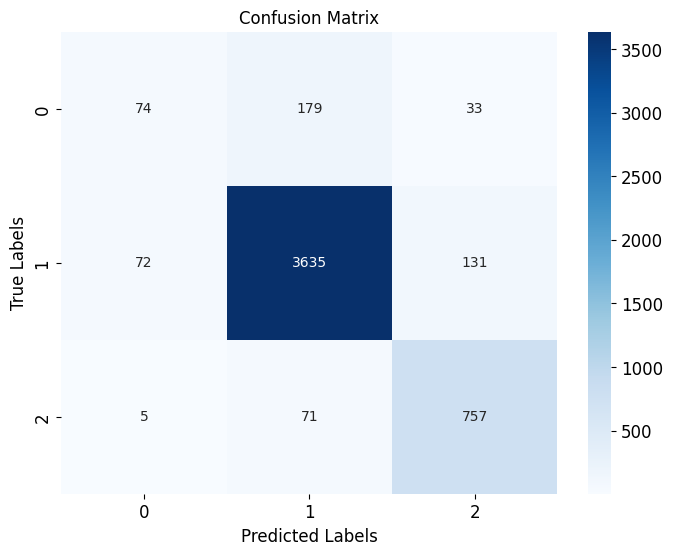

[[  74  179   33]
 [  72 3635  131]
 [   5   71  757]]


In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

y_pred_labels = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print(cm)